In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
import seaborn as sns

In [18]:
file = 'C:\\Users\\daun5\\jupyter_notebook\\EC-Advance_daun\\data.xlsx'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [19]:
df = pd.read_excel(file)

In [20]:
y = df[['monthly_total']]

In [21]:
x = df.drop(columns=['room_id', 'monthly_total'], axis = 1)
#방향포함

x = df.drop(columns=['room_id', 'monthly_total', 'north_west', 'north', 'north_east', 
                     'east', 'south_east', 'south', 'south_west', 'west'], axis = 1)
#방향미포함

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
x_scale = df[['room_size', 'month_gap', 'deposit']]
scaler =StandardScaler()
scaler.fit(x)
x_standard = scaler.transform(x)
x_standard_scaled = pd.DataFrame(data=x_standard, columns=x.columns)
print('feature 들의 평균 값')
print(x_standard_scaled.mean())
print('\nfeature 들의 분산 값')
print(x_standard_scaled.var())
scaler = MinMaxScaler() #정규화
scaler.fit(x)
x_scaler = scaler.transform(x)
x_minmax = pd.DataFrame(data=x_scaler)
print('feature 들의 정규화 최소 값')
print(x_minmax.min())
print('\nfeature 들의 정규화 최대 값')
print(x_minmax.max())

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [23]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
my_apartment = [[16.52,65,0, 500, 0, 0, 0, 1, 1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0]] 
my_predict = lr.predict(my_apartment)
my_predict #방향포함

array([[34.45566788]])

my_apartment = [[16.52,65,0, 500, 0, 0, 0, 1, 1,0,1,1,1,1,0,0,1,0,1,0,1,0,0]] 
my_predict = lr.predict(my_apartment)
my_predict #방향미포함

In [25]:
y_predict = lr.predict(x_test)

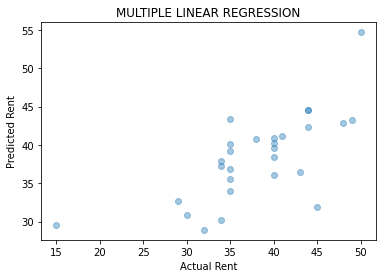

In [26]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [27]:
print(lr.coef_)

[[ 9.70711368e-01 -3.47535190e-02  8.89457775e+00 -3.23931354e-03
  -1.09352551e+01 -2.66453526e-15  6.21724894e-15  6.72578891e+00
   3.41730298e-01  4.44089210e-15 -1.32697219e+01  7.49433198e-01
  -1.52715775e+00  5.02582625e-01  0.00000000e+00  1.99806042e+00
   1.44770923e+00  4.92119409e+00 -3.62240291e-01 -1.59835540e+00
   2.73436015e-01 -7.81875803e+00  1.13895396e+00  1.98644575e+00
  -6.70180403e-01  1.13552629e+01  3.50801728e+00  2.00956527e+00
  -4.83744774e-01 -4.29436556e+00 -8.34598600e-01]]


In [28]:
print(lr.score(x_train, y_train)) #방향포함 0.6891689 미포함 0.7062932

0.6891689427328098


In [29]:
joblib.dump(lr, './lr_model.pkl')

['./lr_model.pkl']

In [30]:
x.corr()

,room_size,age_month,room_floor_str,deposit,gasrange,frige,wash,shoes,doorlock,air,induction,closet,microwave,desk,bed,north_west,north,north_east,east,south_east,south,south_west,west,videophone,robby,man,cctv,window,intercom,cardkey,firealarm
room_size,1.000000,0.321580,0.040720,0.260656,0.343640,NaN,NaN,-0.321440,-0.192815,NaN,-0.421753,-0.331739,-0.355756,-0.353773,NaN,-0.090041,-0.105466,-0.030946,0.106214,-0.063162,0.130079,-0.090041,-0.103865,-0.073267,-0.231286,-0.033442,-0.081122,-0.057100,-0.049625,0.037267,-0.061943
age_month,0.321580,1.000000,0.097585,0.258406,0.416357,NaN,NaN,-0.258517,-0.184700,NaN,-0.390675,-0.327845,-0.374283,-0.363666,NaN,0.011879,-0.066118,-0.036033,0.045659,-0.034351,-0.100772,-0.043730,0.151497,-0.077648,-0.230285,-0.082285,-0.218036,-0.087756,-0.218994,-0.007358,-0.022205
room_floor_str,0.040720,0.097585,1.000000,0.164600,0.101021,NaN,NaN,0.033528,-0.024438,NaN,-0.128295,-0.056977,-0.114945,-0.182300,NaN,0.028933,-0.082097,0.020385,0.045825,-0.137448,0.019461,-0.114700,0.074340,0.063007,-0.033484,0.172566,-0.015401,-0.130473,-0.078560,0.135026,0.122955
deposit,0.260656,0.258406,0.164600,1.000000,0.014202,NaN,NaN,-0.081846,0.008739,NaN,-0.060691,-0.065941,-0.174228,-0.164738,NaN,-0.057225,-0.042609,-0.040317,0.091539,0.135102,-0.051637,-0.093381,-0.021406,0.144834,-0.065096,-0.021069,-0.154292,-0.061460,-0.127003,0.026521,0.009011
gasrange,0.343640,0.416357,0.101021,0.014202,1.000000,NaN,NaN,-0.059066,-0.071588,NaN,-0.787408,-0.202333,-0.221221,-0.387423,NaN,0.117719,-0.017234,-0.035911,-0.058855,0.026387,0.094515,-0.050971,-0.054796,-0.029365,-0.151252,-0.050971,-0.117122,0.037220,-0.065819,0.108091,-0.068290
frige,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shoes,-0.321440,-0.258517,0.033528,-0.081846,-0.059066,NaN,NaN,1.000000,0.402379,NaN,0.509804,0.509805,0.271535,0.290812,NaN,0.040436,0.116398,0.028488,-0.092131,0.064646,-0.126068,0.040436,0.103893,0.088056,0.403522,0.040436,0.321788,0.145120,0.133218,0.071082,0.113005
doorlock,-0.192815,-0.184700,-0.024438,0.008739,-0.071588,NaN,NaN,0.402379,1.000000,NaN,0.314469,0.463520,0.286458,0.231407,NaN,0.071431,0.046836,0.050326,0.067152,0.026012,-0.012120,-0.066471,-0.124829,0.155554,0.457491,0.071431,0.404800,0.166375,0.325961,0.125569,0.101475
air,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,1.701254,room_size
1,1.793960,age_month
2,1.258798,room_floor_str
3,1.492806,deposit
4,6.029145,gasrange
5,NaN,frige
6,NaN,wash
7,3.068436,shoes
8,1.774407,doorlock
9,NaN,air


In [32]:
from sklearn.model_selection import cross_val_score
basic_scores = cross_val_score(lr ,x ,y)
print("교차 검증 평균 점수 : {:.2f}".format(basic_scores.mean()))
print("교차 검증 점수 : ", basic_scores)

교차 검증 평균 점수 : 0.23
교차 검증 점수 :  [ 0.43320723  0.50044312  0.09520538 -0.17951352  0.28960386]


In [40]:
import statsmodels.api as sm
model = sm.OLS(y, x)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          monthly_total   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     9.534
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           3.74e-18
Time:                        12:19:04   Log-Likelihood:                -416.28
No. Observations:                 139   AIC:                             886.6
Df Residuals:                     112   BIC:                             965.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
room_size          0.9259      0.138      6.

In [37]:
result = lr.fit